In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
movie_df.columns

Index(['imdb_id', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

# 1) Only Facebook Likes

In [4]:
classification_df = movie_df.drop(columns=['imdb_id', 'director_name', 'num_critic_for_reviews',
       'actor_2_name',
       'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords',
       'num_user_for_reviews',
       'title_year', 'imdb_score',
       'movie_facebook_likes','director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank'])

In [5]:
classification_df

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language,country,content_rating,budget,...,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio
0,123.0,446.0,821.0,20000.0,22209,1.0,English,USA,PG-13,48000000.0,...,0,0,1,0,1,0,0,0,0,0.981155
1,88.0,104.0,318.0,628.0,2726,0.0,English,USA,PG,3500000.0,...,0,0,0,0,0,0,0,0,0,23.828571
2,104.0,116.0,83.0,1000.0,1662,0.0,English,USA,R,4500000.0,...,0,1,1,0,0,0,1,0,0,13.078468
3,148.0,644.0,326.0,1000.0,2566,1.0,English,USA,R,27000000.0,...,1,0,0,0,0,0,1,0,1,2.007407
4,98.0,11000.0,484.0,13000.0,14921,3.0,English,USA,R,6000000.0,...,0,0,0,0,0,0,0,0,1,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,89.0,190.0,17000.0,17860,0.0,English,USA,R,35000000.0,...,0,0,0,0,0,0,0,0,0,1.579766
3848,100.0,24.0,851.0,15000.0,18786,9.0,English,USA,R,20000000.0,...,0,0,0,0,0,0,0,0,0,2.773065
3849,92.0,89.0,355.0,729.0,2848,4.0,English,USA,R,5000000.0,...,0,0,0,0,0,0,0,0,0,2.335036
3850,81.0,26.0,300.0,2000.0,3344,0.0,English,USA,PG-13,4900000.0,...,0,0,0,1,0,0,0,0,0,11.537962


## 1.1) All Movies

In [6]:
classification1_df=classification_df.drop(columns=['country','language'])
df1 = pd.get_dummies(classification1_df, columns=['content_rating'])
df1 = df1.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
Q1 = df1['gross_budget_ratio'].quantile(0.25)
Q3 = df1['gross_budget_ratio'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filtering = (df1['gross_budget_ratio'] >= Q1 - 1.5 * IQR) & (df1['gross_budget_ratio'] <= Q3 + 1.5 *IQR)
df1=df1.loc[filtering] 
df1

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0.981155,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2.007407,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0.100000,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1.546517,1,0,0
11,325.0,517.0,678.0,12000.0,14255,0.0,4.400000e+07,849.0,0,0,...,0,0,0,1,0,1,0.034091,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0.940072,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1.579766,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2.773065,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2.335036,0,0,1


## 1.1.1) Without log and feature elimination

In [7]:
X = df1.drop(columns=['gross_budget_ratio'])
y = df1['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2459, 22)
Dimensionality of X_test : (1054, 22)
Dimensionality of y_train: (2459,)
Dimensionality of y_test : (1054,)


### 1.1.1.1) Ridge Regression

In [8]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [9]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 1.6}
ridge score: -1.0111273760999235
ridge MSE: 1.0111273760999235
ridge best estimator coef: [ 0.45923224  0.40343523  0.4384482   0.09778562  0.60851848  0.35402655
 -1.02985428  0.2365756  -0.11043222  0.03842381 -0.11218252 -0.15577433
 -0.05707474 -0.01651096 -0.16240432  0.23585182 -0.16477063 -0.30059208
 -0.08783508  0.33398162  0.38731664  0.24242572]


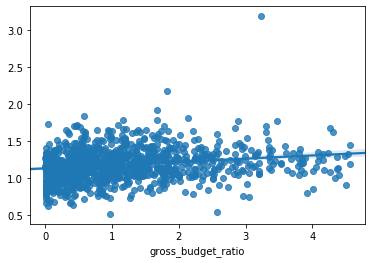

In [10]:
sns.regplot(y_test, y_pred )

### 1.1.1.2) Lasso Regression

In [11]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.0544373009111565
Lasso MSE: 1.0544373009111565
Lasso best estimator coef: [-0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0.
 -0.  0.  0. -0.]


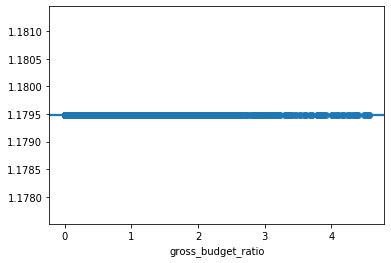

In [12]:
sns.regplot(y_test, y_pred )

### 1.1.1.3) Decision Tree Regressor

In [13]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.25, 'min_samples_split': 0.001}
DTR score: -1.0380659897215243
DTR MSE: 1.0380659897215243


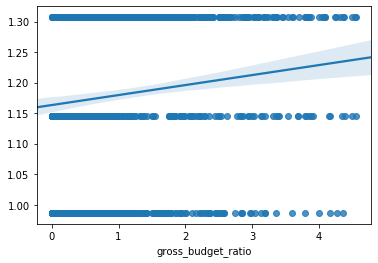

In [14]:
sns.regplot(y_test, y_pred )

### 1.1.1.4) Random Forest Regressor

In [15]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0093323446369824
RFR MSE: 1.0093323446369824


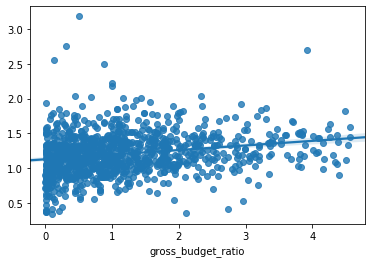

In [16]:
sns.regplot(y_test, y_pred )

## 1.1.2) With taking log and feature elimination

### log

In [17]:
df2 = df1.copy()
df2['budget'] = np.log(df2['budget'])
df2['director_facebook_likes'] = df2['director_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_1_facebook_likes'] = df2['actor_1_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_2_facebook_likes'] = df2['actor_2_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['actor_3_facebook_likes'] = df2['actor_3_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df2['cast_total_facebook_likes'] = df2['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [18]:
df2.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others', 'gross_budget_ratio', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [19]:
df2 = df2.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

In [20]:
X = df2.drop(columns=['gross_budget_ratio'])
y = df2['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2459, 16)
Dimensionality of X_test : (1054, 16)
Dimensionality of y_train: (2459,)
Dimensionality of y_test : (1054,)


### 1.1.2.1) Ridge Regression

In [21]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [22]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.2}
ridge score: -0.9868985849478591
ridge MSE: 0.9868985849478591
ridge best estimator coef: [ 1.12904082  0.27867357  0.52728447 -1.30886326  2.6185455  -1.99090967
 -0.37676371  0.06976749 -0.18596756 -0.01717048  0.32697643 -0.10689371
 -0.05679523  0.30258088  0.40760794  0.19676938]


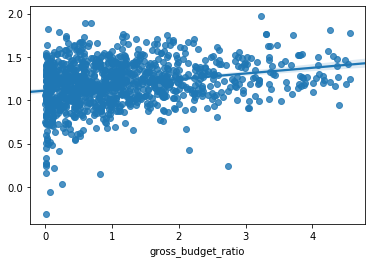

In [23]:
sns.regplot(y_test, y_pred )

### 1.1.2.2) Lasso Regression

In [24]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.0544373009111565
Lasso MSE: 1.0544373009111565
Lasso best estimator coef: [-0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.]


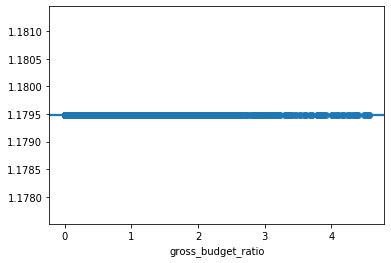

In [25]:
sns.regplot(y_test, y_pred )

### 1.1.2.3) Decision Tree Regressor

In [26]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.25, 'min_samples_split': 0.001}
DTR score: -1.0380659897215243
DTR MSE: 1.0380659897215243


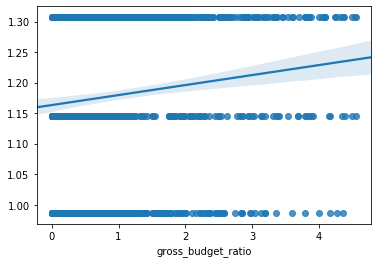

In [27]:
sns.regplot(y_test, y_pred )

### 1.1.2.4) Random Forest Regressor

In [28]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -0.9990234169841016
RFR MSE: 0.9990234169841016


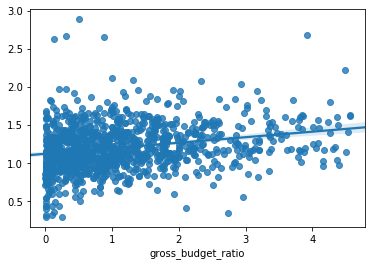

In [29]:
sns.regplot(y_test, y_pred )

## 1.2) Only US and UK Movies

In [30]:
classification2_df= classification_df.copy()
classification2_df = classification2_df[(classification2_df.country=='USA') | (classification2_df.country=='UK')]
classification2_df = classification2_df[(classification2_df.language=='English')]
classification2_df=classification2_df.drop(columns=['country','language'])
df3 = pd.get_dummies(classification2_df, columns=['content_rating'])
df3 = df3.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17'])
Q1 = df3['gross_budget_ratio'].quantile(0.25)
Q3 = df3['gross_budget_ratio'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filtering = (df3['gross_budget_ratio'] >= Q1 - 1.5 * IQR) & (df3['gross_budget_ratio'] <= Q3 + 1.5 *IQR)
df3=df3.loc[filtering]
df3

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,gross_budget_ratio,content_rating_PG,content_rating_PG-13,content_rating_R
0,123.0,446.0,821.0,20000.0,22209,1.0,4.800000e+07,1000.0,0,1,...,0,1,0,0,0,0,0.981155,0,1,0
3,148.0,644.0,326.0,1000.0,2566,1.0,2.700000e+07,809.0,0,1,...,0,0,0,1,0,1,2.007407,0,0,1
5,124.0,42.0,161.0,801.0,1462,0.0,2.000000e+07,174.0,1,1,...,0,0,0,0,0,1,0.100000,1,0,0
6,124.0,150.0,572.0,874.0,2667,0.0,5.166449e+07,816.0,1,0,...,0,0,0,0,0,1,1.546517,1,0,0
11,325.0,517.0,678.0,12000.0,14255,0.0,4.400000e+07,849.0,0,0,...,0,0,0,1,0,1,0.034091,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,121.0,35.0,473.0,4000.0,6617,0.0,5.000000e+06,849.0,0,0,...,0,0,0,0,0,0,0.940072,0,1,0
3847,92.0,89.0,190.0,17000.0,17860,0.0,3.500000e+07,329.0,0,1,...,0,0,0,0,0,0,1.579766,0,0,1
3848,100.0,24.0,851.0,15000.0,18786,9.0,2.000000e+07,1000.0,0,1,...,0,0,0,0,0,0,2.773065,0,0,1
3849,92.0,89.0,355.0,729.0,2848,4.0,5.000000e+06,706.0,0,1,...,0,0,0,0,0,0,2.335036,0,0,1


## 1.2.1) Without log and feature elimination

In [31]:
X = df3.drop(columns=['gross_budget_ratio'])
y = df3['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2122, 22)
Dimensionality of X_test : (910, 22)
Dimensionality of y_train: (2122,)
Dimensionality of y_test : (910,)


### 1.2.1.1) Ridge Regression

In [32]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [33]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.1}
ridge score: -1.103827964019871
ridge MSE: 1.103827964019871
ridge best estimator coef: [ 2.25571646  0.14682187  0.09306448 -2.9945183   3.5663605  -0.00782081
 -1.14621598 -0.15947853 -0.13350177  0.13519573 -0.05722077 -0.18096748
 -0.05381968  0.01797727 -0.0611111   0.41005682 -0.04969448 -0.05475758
 -0.11607151  0.10855652  0.23129947  0.05262241]


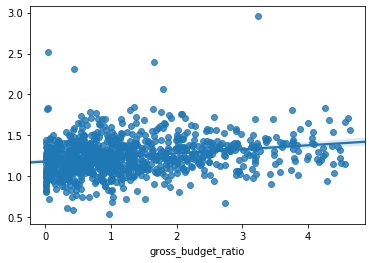

In [34]:
sns.regplot(y_test, y_pred )

### 1.2.1.2) Lasso Regression

In [35]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.1678930038823336
Lasso MSE: 1.1678930038823336
Lasso best estimator coef: [ 0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0.
 -0.  0.  0. -0.]


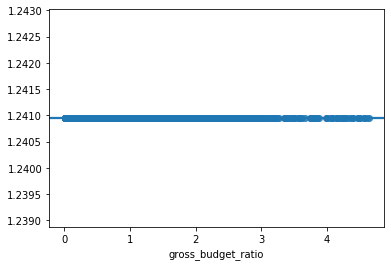

In [36]:
sns.regplot(y_test, y_pred )

### 1.2.1.3) Decision Tree Regressor

In [37]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTR score: -1.1558325328918793
DTR MSE: 1.1558325328918793


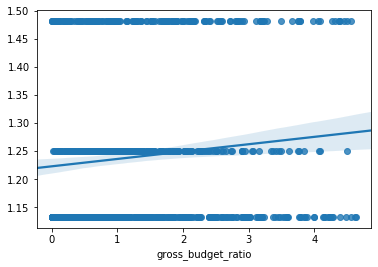

In [38]:
sns.regplot(y_test, y_pred )

### 1.2.1.4) Random Forest Regressor

In [39]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0807668852046706
RFR MSE: 1.0807668852046706


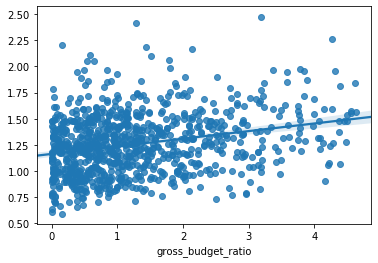

In [40]:
sns.regplot(y_test, y_pred )

## 1.2.2) With taking log and feature elimination

### log

In [41]:
df4 = df3.copy()
df4['budget'] = np.log(df4['budget'])
df4['director_facebook_likes'] = df4['director_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_1_facebook_likes'] = df4['actor_1_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_2_facebook_likes'] = df4['actor_2_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['actor_3_facebook_likes'] = df4['actor_3_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))
df4['cast_total_facebook_likes'] = df4['cast_total_facebook_likes'].transform(lambda x: 0 if x <= 3 else np.log(x))

### elimination

In [42]:
df4.columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Romance', 'Mystery_Thriller_Horror',
       'Sci-Fi_Fantasy', 'Family_Animation', 'Action_Adventure', 'History_War',
       'Others', 'gross_budget_ratio', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [43]:
df4 = df4.drop(columns = ['facenumber_in_poster', 'Biography', 'Crime',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'History_War'])

In [44]:
X = df4.drop(columns=['gross_budget_ratio'])
y = df4['gross_budget_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print(f"Dimensionality of X_train: {X_train.shape}")
print(f"Dimensionality of X_test : {X_test.shape}")
print(f"Dimensionality of y_train: {y_train.shape}")
print(f"Dimensionality of y_test : {y_test.shape}")

Dimensionality of X_train: (2122, 16)
Dimensionality of X_test : (910, 16)
Dimensionality of y_train: (2122,)
Dimensionality of y_test : (910,)


### 1.2.2.1) Ridge Regression

In [45]:
MMScaler = MinMaxScaler()
X_train_scaled = MMScaler.fit_transform(X_train)
X_test_scaled = MMScaler.transform(X_test)

In [46]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = Ridge()
clf1 = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error')
clf1.fit(X_train_scaled, y_train)

y_pred = clf1.predict(X_test_scaled)

print("ridge best parameters:", clf1.best_params_)
print("ridge score:", clf1.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, clf1.predict(X_test_scaled)))
print("ridge best estimator coef:", clf1.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.1}
ridge score: -1.1234039831439706
ridge MSE: 1.1234039831439706
ridge best estimator coef: [ 1.89154051  0.19569701  0.13504697 -1.79179404  2.90597066 -1.28679263
 -0.12925504  0.13748385 -0.16153967 -0.02128791  0.35453183 -0.09694981
 -0.09135384  0.13915629  0.23259149  0.0811068 ]


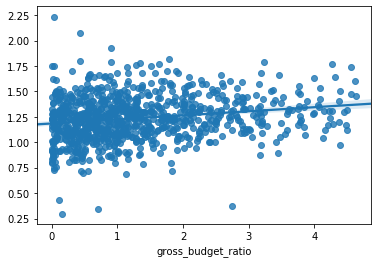

In [47]:
sns.regplot(y_test, y_pred )

### 1.2.2.2) Lasso Regression

In [48]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
Lasso = linear_model.Lasso()
clf2 = GridSearchCV(Lasso, parameters, scoring ='neg_mean_squared_error')
clf2.fit(X_train_scaled, y_train)

y_pred = clf2.predict(X_test_scaled)

print("Lasso best parameters:", clf2.best_params_)
print("Lasso score:", clf2.score(X_test_scaled, y_test))
print("Lasso MSE:", mean_squared_error(y_test, clf2.predict(X_test_scaled)))
print("Lasso best estimator coef:", clf2.best_estimator_.coef_)

Lasso best parameters: {'alpha': 0.1}
Lasso score: -1.1678930038823336
Lasso MSE: 1.1678930038823336
Lasso best estimator coef: [ 0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.]


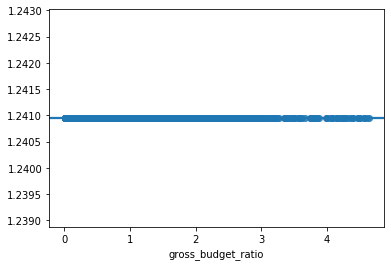

In [49]:
sns.regplot(y_test, y_pred )

### 1.2.2.3) Decision Tree Regressor

In [50]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
clf3 = GridSearchCV(DTR, parameters, scoring ='neg_mean_squared_error')
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print("DTR best parameters:", clf3.best_params_)
print("DTR score:", clf3.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, clf3.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.5}
DTR score: -1.155832532891879
DTR MSE: 1.155832532891879


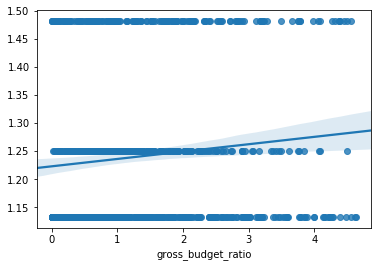

In [51]:
sns.regplot(y_test, y_pred )

### 1.2.2.4) Random Forest Regressor

In [52]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
clf4 = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='neg_mean_squared_error')
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

print("RFR best parameters:", clf4.best_params_)
print("RFR score:", clf4.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, clf4.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: -1.0881421050279232
RFR MSE: 1.0881421050279232


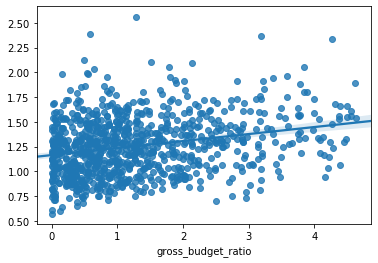

In [53]:
sns.regplot(y_test, y_pred )